<a href="https://colab.research.google.com/github/lari-guimaraes/Estudos_machine_learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#Visualizando o dataset

In [2]:
#crregar o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


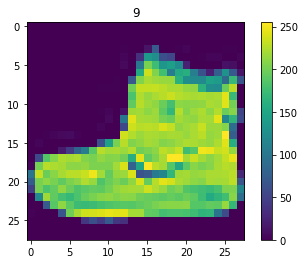

In [3]:
#explorar os dados
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
identificacoes_treino.min()
identificacoes_treino.max()

#exibir os dados
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [4]:

imagens_treino = imagens_treino/float(255)


# Criando, compilando, treinando e normalizando o modelo

In [24]:

modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),  
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size = 480,epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


100/100 [==============================] - 2s 17ms/step - loss: 0.6372 - accuracy: 0.7781 - val_loss: 0.4507 - val_accuracy: 0.8428
Epoch 2/5
100/100 [==============================] - 2s 16ms/step - loss: 0.4336 - accuracy: 0.8472 - val_loss: 0.3895 - val_accuracy: 0.8643
Epoch 3/5
100/100 [==============================] - 2s 16ms/step - loss: 0.3907 - accuracy: 0.8612 - val_loss: 0.3845 - val_accuracy: 0.8618
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 0.3576 - accuracy: 0.8722 - val_loss: 0.3582 - val_accuracy: 0.8667
Epoch 5/5
100/100 [==============================] - 2s 16ms/step - loss: 0.3373 - accuracy: 0.8775 - val_loss: 0.3424 - val_accuracy: 0.8762


## Sumário do Modelo

In [6]:
modelo.summary()
#resumo do modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Pesos da primeira camada Dense

In [7]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.16123466, -0.07081458,  0.04934847, ...,  0.00737777,
         0.01312392, -0.02777291],
       [ 0.02432526,  0.01245423, -0.08231343, ...,  0.09126709,
        -0.08259726, -0.02558358],
       [ 0.23763251,  0.068046  , -0.02556746, ...,  0.04282024,
         0.05557979,  0.00215897],
       ...,
       [-0.13795981, -0.06467046,  0.01834431, ...,  0.18351403,
        -0.06915418,  0.03589977],
       [ 0.04598906,  0.01551429,  0.01050389, ..., -0.07944939,
        -0.10767864, -0.0490052 ],
       [ 0.05711038, -0.02321477, -0.06275263, ..., -0.07239196,
        -0.03238531, -0.05125967]], dtype=float32)

In [8]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]


In [10]:
pesos_camada_dense_aleatorios = np.random.rand(784,256)
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [11]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784,256))

pesos_camada_dense_aleatorios = np.random.rand(784,256)

'''
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
'''
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])


pesos_camada_dense_aleatorios

array([[0.62724229, 0.95853162, 0.34467675, ..., 0.76068004, 0.56804882,
        0.99565661],
       [0.63306606, 0.42586575, 0.57210847, ..., 0.69224505, 0.52129803,
        0.9470681 ],
       [0.62114908, 0.80673499, 0.88812221, ..., 0.21561875, 0.26935341,
        0.46259483],
       ...,
       [0.77881611, 0.70792836, 0.97169953, ..., 0.33410515, 0.32186217,
        0.38531785],
       [0.51535899, 0.23240408, 0.30484776, ..., 0.90228132, 0.27158326,
        0.80299245],
       [0.80008157, 0.88843409, 0.53973367, ..., 0.89882275, 0.44894065,
        0.20075643]])

In [12]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 86.1142 - accuracy: 0.4206 - val_loss: 15.9246 - val_accuracy: 0.6695
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 22.8296 - accuracy: 0.6262 - val_loss: 7.5882 - val_accuracy: 0.7227
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 10.2204 - accuracy: 0.6809 - val_loss: 4.4380 - val_accuracy: 0.7626
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 5.3462 - accuracy: 0.7088 - val_loss: 2.7067 - val_accuracy: 0.7607
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 3.0291 - accuracy: 0.7345 - val_loss: 2.2952 - val_accuracy: 0.7238


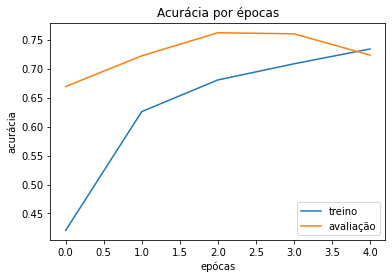

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('epócas')
plt.ylabel('acurácia')
plt.legend(['treino', 'avaliação'])

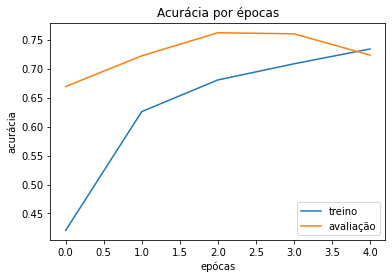

In [14]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('epócas')
plt.ylabel('acurácia')
plt.legend(['treino', 'avaliação'])

In [15]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

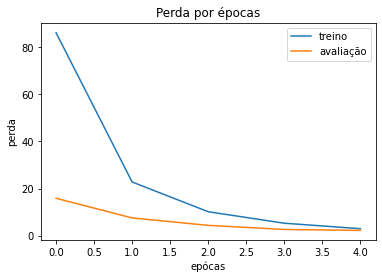

In [16]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('epócas')
plt.ylabel('perda')
plt.legend(['treino', 'avaliação'])

# Salvando o modelo carregado

In [17]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por época

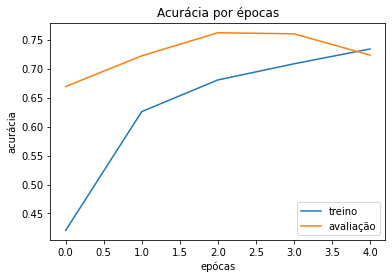

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('epócas')
plt.ylabel('acurácia')
plt.legend(['treino', 'avaliação'])

# Visualizando as perdas de treino e validação por época

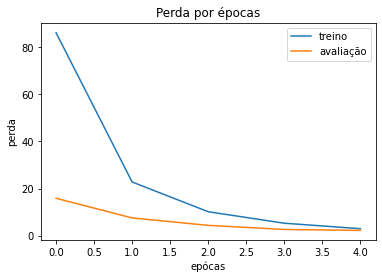

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('epócas')
plt.ylabel('perda')
plt.legend(['treino', 'avaliação'])

# Testando o modelo e o modelo salvo

In [20]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[0]))
print('número da imagem de teste: ', identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo: ',np.argmax(testes_modelo_salvo[0]))
print('número da imagem de teste modelo salvo: ', identificacoes_teste[0])

resultado teste: 9
número da imagem de teste:  9
resultado teste modelo salvo:  9
número da imagem de teste modelo salvo:  9


# Avaliando o modelo

In [21]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste', acuracia_teste)


313/313 [==============================] - 2s 5ms/step - loss: 656.5146 - accuracy: 0.7257
Perda do teste:  656.5145874023438
Acurácia do teste 0.7257000207901001
